# Plot Multiple Region
This file imports the covid19 package and 
shows how to use it to plot data about one field for multiple states or regions.

In [9]:
from covid19 import *

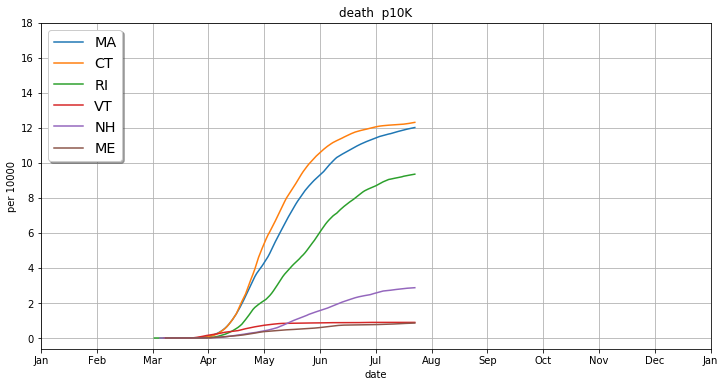

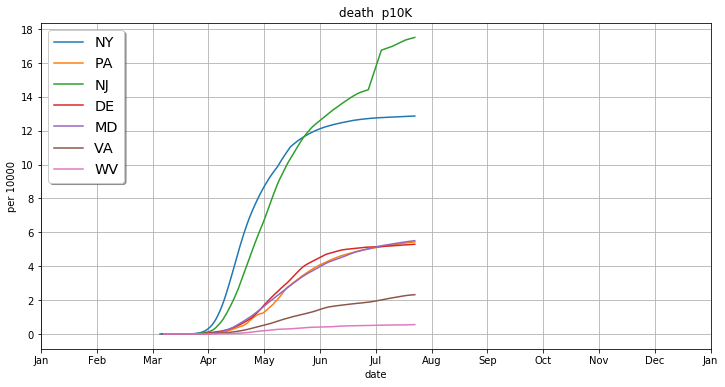

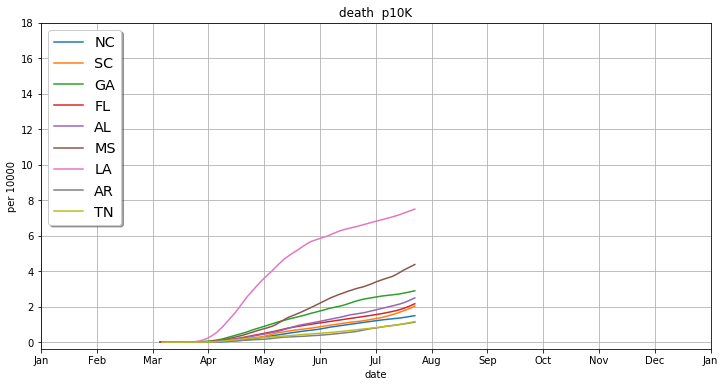

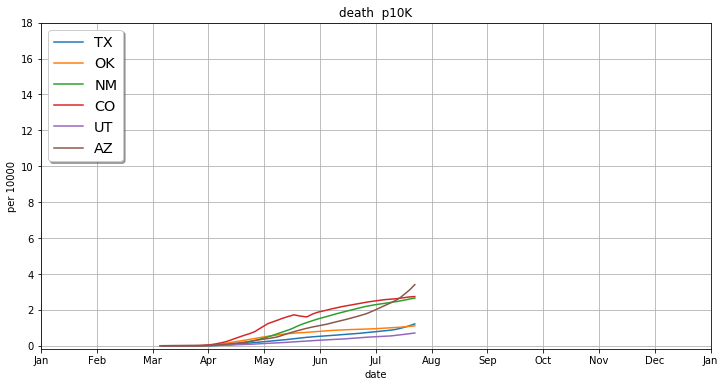

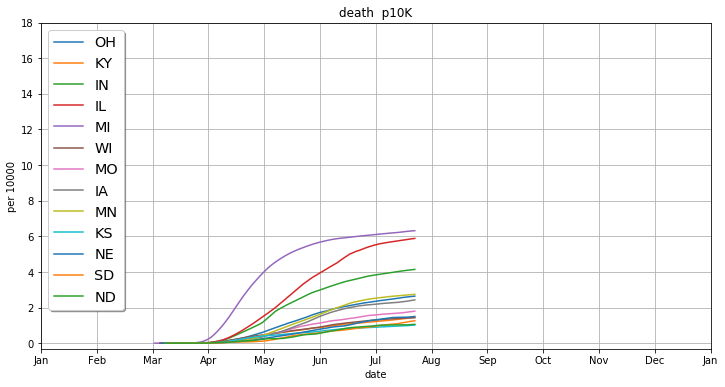

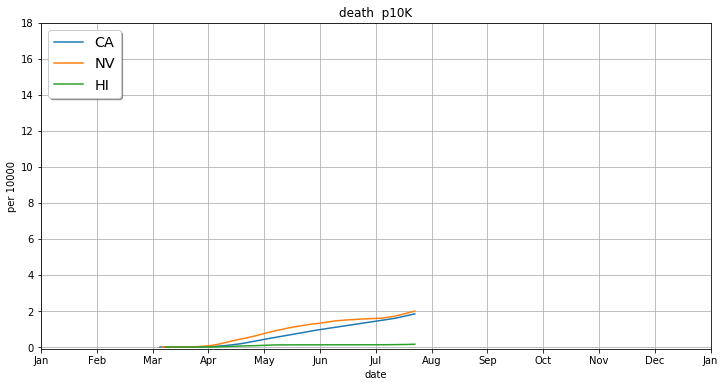

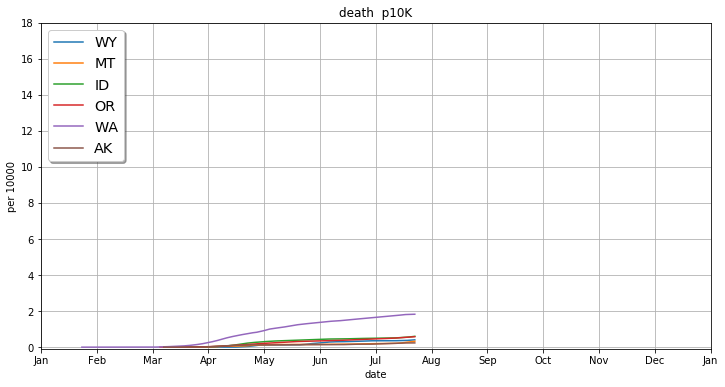

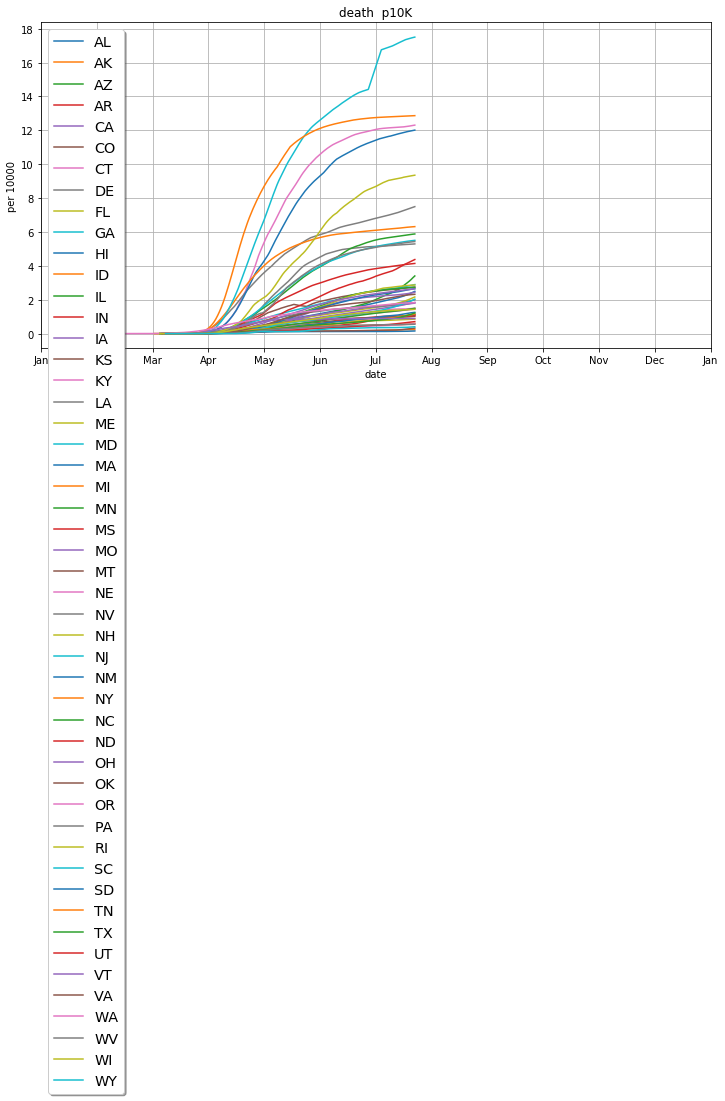

In [12]:

perCapita=True
averageByWeek=True

plt.rcParams['figure.figsize'] = [12, 6]
#fig, ax = plt.subplots()
#field = 'positive'
#field = 'positiveIncrease'
#field = 'deathIncrease'
#field = "hospitalizedCurrently"
#field = "hospitalizedCumulative"
field = "death"
#field = "positive"
#field = "hospitalized"
#field = "inIcuCurrently"
#field = "onVentilatorCurrently"
#field = "totalTestResultsIncrease"
## here we can plot all of the states!!
#for state in deepSouth:
#    plotItems(collectData([state],field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),state)

options = {'perCapita':perCapita,'averageByWeek':averageByWeek}

for region in [northEast,midAtlantic,southEast,southWest,midWest,west,northWest,states]:
  fig, ax = plt.subplots()
  for x in region:
    #plotItems(collectData([x],field,options),x)
    plotItems(collectData([x],field,options),x)
  for y in [0]:
    ax.set(xlabel='day of year',
       ylabel='per 10000' if perCapita else "raw numbers",
       title=field+" "+(" p10K" if perCapita else " raw"))
    plt.xlabel('date')
    plt.yticks(np.arange(0,20,step=2))
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    ax.grid()
    flag = x
    fig.savefig("plot_"+flag+field+("_p10k" if perCapita else "_raw")+".png")

The collectData function takes two parameters ... a list of states, and a field name.
It also has two optional parameters, perCapita (defaults to True) and averageByWeek (defaults to True).
It returns a list of tuples where the first is the day of the year (1/1/2020 = 1 and 12/31/2020 = 366)
and the second is the value of that field for that day (possibly divided by the state population and/or averaged over the past week).

Here is an example of using it to find the number of new cases per day in the last 10 days in MA.